# Data Processing & Cleaning

In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [4]:
df.shape

(28619, 3)

In [5]:
data = df.drop(columns = "article_link")

In [6]:
data

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [7]:
data.shape

(28619, 2)

In [8]:
data.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [9]:
print (list(data))

['is_sarcastic', 'headline']


In [10]:
data['headline'] = data['headline'].str.lower()

# Simple Data Visualisation

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Frequency')

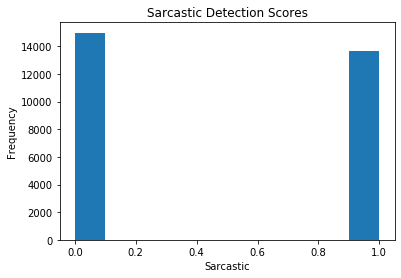

In [33]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['is_sarcastic'])
# set title and labels
ax.set_title('Sarcastic Detection Scores')
ax.set_xlabel('Sarcastic')
ax.set_ylabel('Frequency')

# Natural Language Processing (NLP)

TOKENIZE 

In [26]:
import os
import nltk
from nltk.tokenize import word_tokenize

In [27]:
first_headline = data.iloc[0]
print(first_headline['headline'])

thirtysomething scientists unveil doomsday clock of hair loss


In [28]:
print (nltk.word_tokenize(first_headline['headline']))

['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'of', 'hair', 'loss']


In [30]:
def identify_tokens(row):
    headline = row['headline']
    tokens = nltk.word_tokenize(headline)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
data['words'] = data.apply(identify_tokens, axis=1)

In [31]:
print(data['words'])

0        [thirtysomething, scientists, unveil, doomsday...
1        [dem, totally, nails, why, congress, is, falli...
2        [eat, your, veggies, deliciously, different, r...
3        [inclement, weather, prevents, liar, from, get...
4        [mother, comes, pretty, close, to, using, word...
                               ...                        
28614    [jews, to, celebrate, rosh, hashasha, or, some...
28615    [internal, affairs, investigator, disappointed...
28616    [the, most, beautiful, acceptance, speech, thi...
28617    [mars, probe, destroyed, by, orbiting, space, ...
28618           [dad, clarifies, this, not, a, food, stop]
Name: words, Length: 28619, dtype: object


STEMMING

In [32]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [33]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])


['frighten', 'frighten', 'frighten']


In [34]:
def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

data['stemmed_words'] = data.apply(stem_list, axis=1)

In [35]:
print(data['stemmed_words'])

0        [thirtysometh, scientist, unveil, doomsday, cl...
1        [dem, total, nail, whi, congress, is, fall, sh...
2                [eat, your, veggi, delici, differ, recip]
3        [inclement, weather, prevent, liar, from, get,...
4        [mother, come, pretti, close, to, use, word, c...
                               ...                        
28614        [jew, to, celebr, rosh, hashasha, or, someth]
28615    [intern, affair, investig, disappoint, conspir...
28616    [the, most, beauti, accept, speech, thi, week,...
28617       [mar, probe, destroy, by, orbit, space, palac]
28618              [dad, clarifi, thi, not, a, food, stop]
Name: stemmed_words, Length: 28619, dtype: object


STOPWORDS

In [36]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 

In [37]:
def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data['stem_meaningful'] = data.apply(remove_stops, axis=1)

In [38]:
print(data['stem_meaningful'][0])

['thirtysometh', 'scientist', 'unveil', 'doomsday', 'clock', 'hair', 'loss']


In [39]:
def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

data['processed'] = data.apply(rejoin_words, axis=1)

In [40]:
print(data['processed'])

0        thirtysometh scientist unveil doomsday clock h...
1        dem total nail whi congress fall short gender ...
2                            eat veggi delici differ recip
3                  inclement weather prevent liar get work
4              mother come pretti close use word correctli
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci d...
28616      beauti accept speech thi week came queer korean
28617                  mar probe destroy orbit space palac
28618                            dad clarifi thi food stop
Name: processed, Length: 28619, dtype: object
